In [1]:
from data import Data
from signals import Signals
import backtest as bt
import pandas as pd
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

In [2]:
class Central(Signals):
    
    def __init__(self, login=5528104, senha='YUWNehok', servidor='ActivTradesCorp-Server', balance=1000):
        super().__init__(login, senha, servidor)
        self.balance = balance
        
    
    def back_tpsl(self, tpsl):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy, each_pair =  bt.otimizado_tpsl(self.return_full(), tpsl)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        results_df = pd.DataFrame()
        for index, value in enumerate(each_pair):
            results_df[super().ALL_PAIRS[index]] = pd.Series(np.delete(value, np.where(value == 0.)))
        return tot, sell, buy, results_df
    
    
    def back_no_tpsl(self):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy = bt.otimizado_no_tpsl(self.return_full())
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy
    
    
    def back_tpsl_ohl(self, tpsl):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy = bt.otimizado_tpsl_ohl(self.return_full(), tpsl)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy

In [3]:
robot = Central()

In [4]:
robot.get_data_csv('DataH163k.csv',drop=True,drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [5]:
robot.return_data()['EURUSD_Open']

0        1.20665
1        1.20650
2        1.20642
3        1.20660
4        1.20682
          ...   
62995    1.17623
62996    1.17622
62997    1.17624
62998    1.17604
62999    1.17627
Name: EURUSD_Open, Length: 63000, dtype: float64

In [6]:
robot.pct_data()

In [7]:
robot.teste(20, 10, 8,5 )

c:\users\johnk\appdata\local\programs\python\python39\lib\site-packages\numba\core\dispatcher.py:241: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()
C:\Users\johnk\Google Drive\My_Project\Git\Python\Backtest\indicators.py:36: RuntimeWarning: invalid value encountered in true_divide
  k = np.where(k2 != 0.0, (k1 / k2) * 100, 0.0)
C:\Users\johnk\Google Drive\My_Project\Git\Python\Backtest\indicators.py:36: RuntimeWarning: invalid value encountered in true_divide
  k = np.where(k2 != 0.0, (k1 / k2) * 100, 0.0)


In [8]:
robot.return_data().iloc[:,-56:].sum().sum()

15938

In [9]:
robot.full_data_array()

In [21]:
%%time
tot, sell, buy, all_f = robot.back_tpsl(50)

1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
Wall time: 114 ms


In [22]:
robot.return_full()[16]

array([[0.71622, 0.7162 , 0.71621, ..., 0.70334, 0.70399, 0.70399],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [1.68654, 1.68692, 1.687  , ..., 1.67275, 1.67039, 1.66999],
       [0.71623, 0.71629, 0.71622, ..., 0.70334, 0.70399, 0.70399],
       [0.71618, 0.71612, 0.71618, ..., 0.70334, 0.70399, 0.70399]])

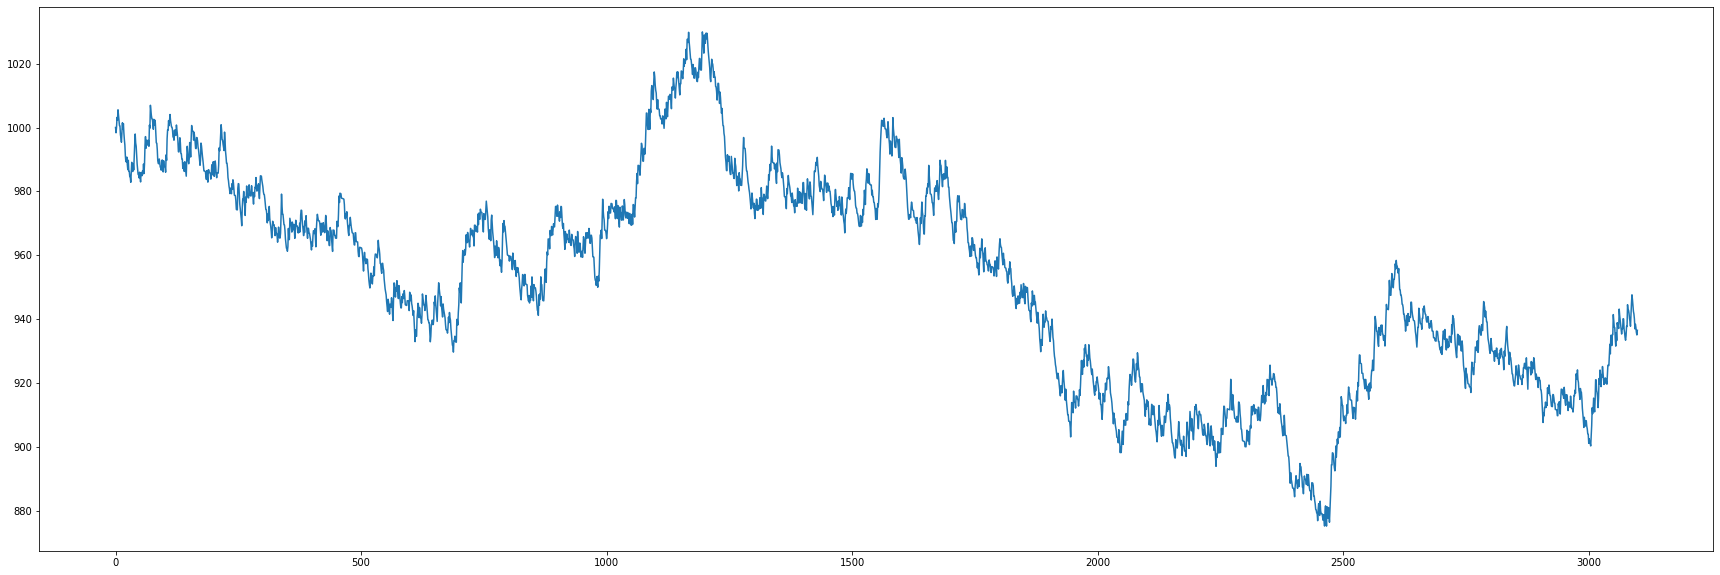

In [23]:
plt.plot(tot)

In [15]:
robot.return_data()

,EURCHF_Open,EURCHF_Close,EURCHF_High,EURCHF_Low,EURGBP_Open,EURGBP_Close,EURGBP_High,EURGBP_Low,EURJPY_Open,EURJPY_Close,...,CADCHF_sell,CADCHF_buy,NZDCHF_sell,NZDCHF_buy,AUDNZD_sell,AUDNZD_buy,NZDCAD_sell,NZDCAD_buy,AUDCAD_sell,AUDCAD_buy
0,1.08185,1.08186,1.08190,1.08184,0.88258,0.88262,0.88263,0.88256,126.732,126.733,...,False,False,False,False,False,False,False,False,False,False
1,1.08186,1.08192,1.08192,1.08186,0.88262,0.88257,0.88262,0.88256,126.733,126.734,...,False,False,False,False,False,False,False,False,False,False
2,1.08192,1.08193,1.08194,1.08192,0.88257,0.88257,0.88260,0.88256,126.733,126.737,...,False,False,False,False,False,False,False,False,False,False
3,1.08192,1.08185,1.08192,1.08185,0.88257,0.88257,0.88261,0.88256,126.737,126.737,...,False,False,False,False,False,False,False,False,False,False
4,1.08186,1.08186,1.08187,1.08185,0.88256,0.88258,0.88261,0.88256,126.737,126.732,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,1.10783,1.10794,1.10794,1.10783,0.85047,0.85045,0.85048,0.85004,130.062,130.062,...,False,False,False,False,False,False,False,False,False,False
62996,1.10794,1.10794,1.10794,1.10794,0.85045,0.85041,0.85045,0.85041,130.062,130.063,...,False,False,False,False,False,False,False,False,False,False
62997,1.10794,1.10794,1.10794,1.10794,0.85041,0.85037,0.85041,0.85037,130.066,130.076,...,False,False,False,False,False,False,False,False,False,False
62998,1.10794,1.10794,1.10794,1.10794,0.85037,0.85055,0.85075,0.85033,130.078,130.103,...,False,False,False,False,False,False,False,False,False,False


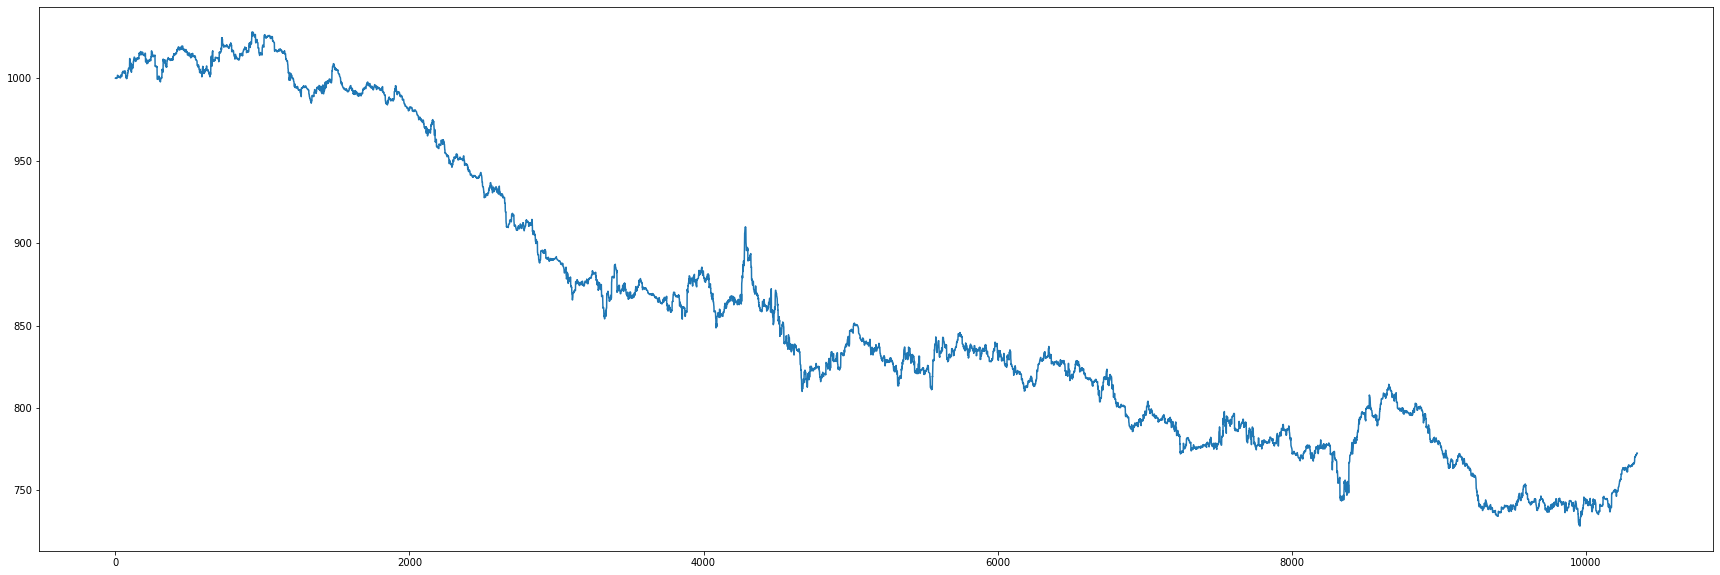

In [16]:
tot2, _, _ = robot.back_no_tpsl()
plt.plot(tot2)

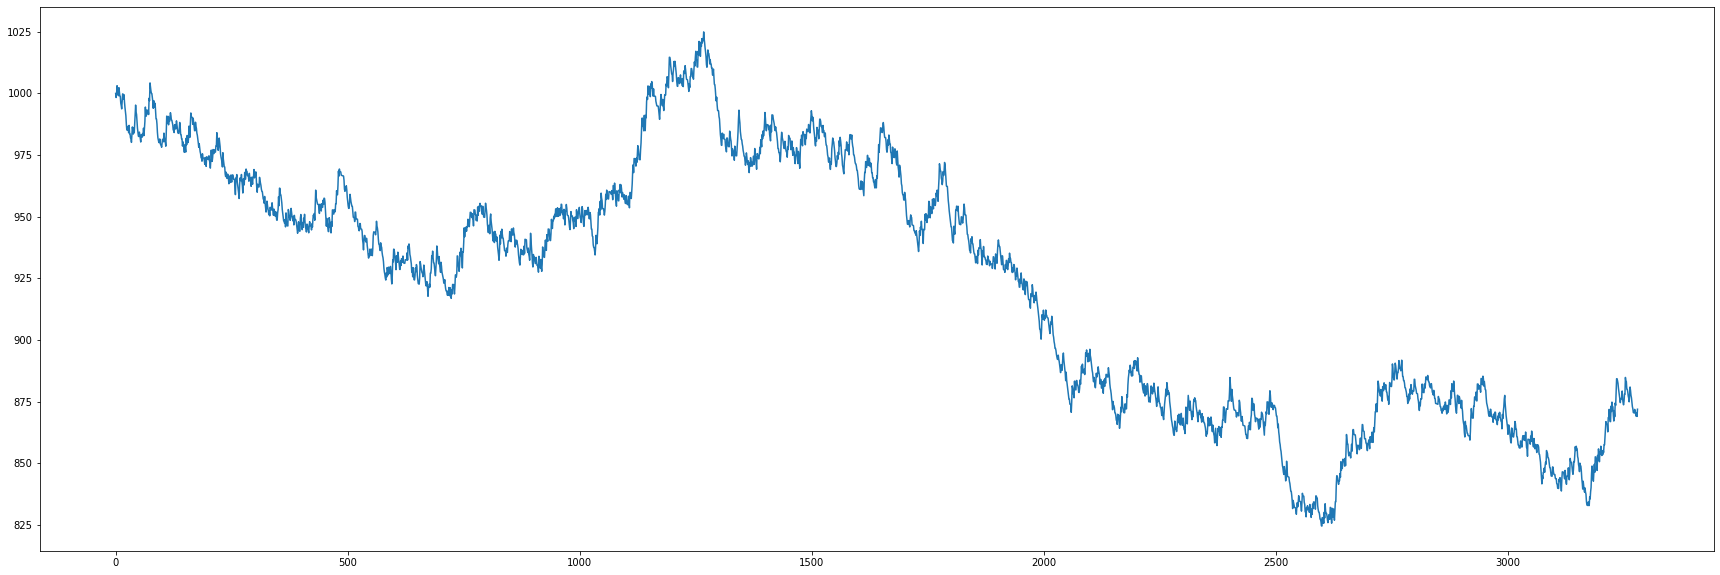

In [17]:
tot3, _, _ = robot.back_tpsl_ohl(50)
plt.plot(tot3)

In [18]:
teste = np.zeros((2,3))

In [19]:
teste

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
teste[1][3] = 10

IndexError: index 3 is out of bounds for axis 0 with size 3

- Rever a colocação dos backtestes por conta do lucro ridiculo
- Colocar o super backtest de 1.3kk
- Se sobrar tempo, pensar em passar os calculos para pandas